# Linear functional terms

As in mgcv, we can use **linear functional terms**. This can be achieved by passing matrices of covariates to [`S`][pymgcv.terms.S] or [`T`][pymgcv.terms.T], in which case the resulting prediction will be the sum of the same smooth, applied to each column of the covariates. For example, for a smooth with two covariates, the $i$-th prediction would be given by
$$
\sum_{j=1}^J f(x_{ij}, z_{ij}), 
$$
where $X$ and $Z$ are $n \times J$ matrices, and $f$ is the spline. Similarly, if a by matrix $B$ with matching shape is provided as a `by` variable, this scales the predictions:
$$
\sum_{j=1}^J b_{ij} f(x_{ij}, z_{ij}), 
$$

We will consider a toy example to predict the number of deaths in a year, in different hospitals, given:

- Monthly pollution levels for each hospital (i.e. J=12).
- Monthly patient loads (as a by variable).

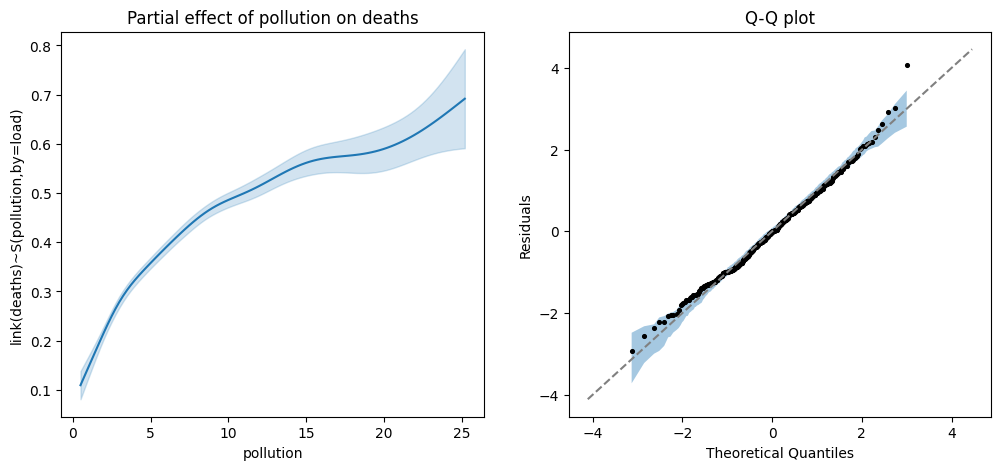

In [1]:
import numpy as np
from pymgcv.gam import GAM
from pymgcv.terms import S
from pymgcv.plot import plot_continuous_1d, plot_qq
from pymgcv.families import Poisson
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)
n_hospitals, n_months = 500, 12

# Create toy data
pollution = rng.lognormal(mean=1.5, sigma=0.5, size=(n_hospitals, n_months))
load = rng.uniform(0.5, 1.5, size=(n_hospitals, n_months))
log_mu = sum(load[:, m] * 0.2 * np.log1p(pollution[:, m]) for m in range(n_months))
deaths = rng.poisson(lam=np.exp(log_mu))

data = {
    "deaths": deaths,
    "pollution": pollution,
    "load": load,
}

gam = GAM(
    {"deaths": S("pollution", by="load")},
    family=Poisson(link="log")
)
gam.fit(data)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_continuous_1d(
    term=gam.predictors["deaths"][0],
    gam=gam,
    ax=axes[0],
    )
plot_qq(gam, ax=axes[1])
axes[0].set_title("Partial effect of pollution on deaths")
axes[1].set_title("Q-Q plot")
None

In this case, the plot shows the shape of the smooth, without summing over columns, and with a weight of 1 (i.e. the by variable is set to 1).